# Orbital Elements

We can add particles to a simulation by specifying cartesian components:

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m=1., x=1., vz = 2.)

Any components not passed automatically default to 0.  

REBOUND can also accept orbital elements.  As a reminder, there is a one-to-one mapping between (x,y,z,vx,vy,vz) and orbital elements, and one should always specify what the orbital elements are referenced against (e.g., the central star, the system's barycenter, etc.).  The differences betwen orbital elements referenced to these centers differ by $\sim$ the mass ratio of the largest body to the central mass.  By default, REBOUND always uses Jacobi elements, which for each particle are always referenced to the center of mass of all particles with lower index in the simulation.  This is a useful set for theoretical calculations, and gives a logical behavior as the mass ratio increase, e.g., in the case of a circumbinary planet.  So for example,

In [2]:
sim.add(m=1.e-3, a=1., e=0.)
sim.move_to_com()
sim.status()

---------------------------------
REBOUND version:     	2.6.0
REBOUND built on:    	Aug 24 2015 18:11:44
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=-1 m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, id=-1 m=0.0 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.000499875062461 vz=0.0>
---------------------------------


In [3]:
orbits = sim.calculate_orbits()
for orbit in orbits:
    print(orbit)

<rebound.Orbit instance, a=1.0010010010010009 e=0.0009999999999998899 inc=0.0 Omega=3.141592653589793 omega=3.141592653589793 f=0.0>


Notice that our planet has the same vz as the central body due to the default Jacobi elements.  If we don't want Jacobi coordinates, we can override the default by passing a primary (any instance of the Particle class) explicitly:

In [3]:
sim.add(m=1.e-5, primary=sim.particles[0], a=3.)

REBOUND can also handle hyperbolic orbits, which have negative semimajor axes and $e>1$:

In [4]:
sim.add(a=-0.2, e=1.4)
sim.status()

---------------------------------
REBOUND version:     	2.6.0
REBOUND built on:    	Aug 24 2015 18:11:44
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=-1 m=1.0 x=1.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=2.0>
<rebound.Particle object, id=-1 m=0.0 x=2.0 y=0.0 z=0.0 vx=0.0 vy=1.000499875062461 vz=2.0>
<rebound.Particle object, id=-1 m=0.0 x=4.0 y=0.0 z=0.0 vx=0.0 vy=0.5773531559337549 vz=2.0>
<rebound.Particle object, id=-1 m=0.0 x=1.08 y=0.0 z=0.0 vx=0.0 vy=5.477225575051662 vz=2.0>
---------------------------------


All simulations are performed in Cartesian elements, so to avoid the overhead, REBOUND does not update particles' orbital elements as the simulation progresses.  However, we can always calculate them when required with `sim.calculate_orbits()`:

<rebound.Orbit instance, a=1.0010010010010009 e=0.0009999999999998899 inc=0.0 Omega=3.141592653589793 omega=3.141592653589793 f=0.0>
<rebound.Orbit instance, a=3.0000300003000038 e=1.0000000000232045e-05 inc=0.0 Omega=3.141592653589793 omega=3.141592653589793 f=0.0>
<rebound.Orbit instance, a=-0.19999999999999873 e=1.400000000000003 inc=0.0 Omega=3.141592653589793 omega=3.141592653589793 f=0.0>


Let's check the accuracy of the orbital 

[-8.         -7.92929293 -7.85858586 -7.78787879 -7.71717172 -7.64646465
 -7.57575758 -7.50505051 -7.43434343 -7.36363636 -7.29292929 -7.22222222
 -7.15151515 -7.08080808 -7.01010101 -6.93939394 -6.86868687 -6.7979798
 -6.72727273 -6.65656566 -6.58585859 -6.51515152 -6.44444444 -6.37373737
 -6.3030303  -6.23232323 -6.16161616 -6.09090909 -6.02020202 -5.94949495
 -5.87878788 -5.80808081 -5.73737374 -5.66666667 -5.5959596  -5.52525253
 -5.45454545 -5.38383838 -5.31313131 -5.24242424 -5.17171717 -5.1010101
 -5.03030303 -4.95959596 -4.88888889 -4.81818182 -4.74747475 -4.67676768
 -4.60606061 -4.53535354 -4.46464646 -4.39393939 -4.32323232 -4.25252525
 -4.18181818 -4.11111111 -4.04040404 -3.96969697 -3.8989899  -3.82828283
 -3.75757576 -3.68686869 -3.61616162 -3.54545455 -3.47474747 -3.4040404
 -3.33333333 -3.26262626 -3.19191919 -3.12121212 -3.05050505 -2.97979798
 -2.90909091 -2.83838384 -2.76767677 -2.6969697  -2.62626263 -2.55555556
 -2.48484848 -2.41414141 -2.34343434 -2.27272727 -2.20

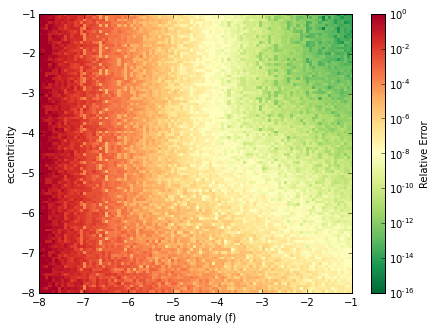

In [5]:
import rebound
import random
import numpy as np

def simulation(par):
    e,f = par
    e = 10**e
    f = 10**f
    sim = rebound.Simulation()
    sim.add(m=1.)
    a = 1.
    inc = random.random()*np.pi
    Omega = random.random()*2*np.pi
    omega = random.random()*2*np.pi
    sim.add(m=0.,a=a,e=e,inc=inc,Omega=Omega, omega=omega,f=f)
    o=sim.calculate_orbits()[0]
    if o.omega < 0:
        o.omega += 2*np.pi
    if o.Omega < 0:
        o.Omega += 2*np.pi
    if o.f < 0:
        o.f += 2*np.pi
    err = max(np.fabs(o.e-e)/e, np.fabs(o.f-f)/f)
    return err

random.seed(1)
N = 100
es = np.linspace(-8.,-1.,N)
fs = np.linspace(-8.,-1.,N)
print(es)
params = [(e,f) for e in es for f in fs]

pool=rebound.InterruptiblePool()
res = pool.map(simulation, params)
res = np.array(res).reshape(N,N)
res = np.nan_to_num(res)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LogNorm
import matplotlib

f,ax = plt.subplots(1,1,figsize=(7,5))
extent=[fs.min(), fs.max(), es.min(), es.max()]

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xlabel(r"true anomaly (f)")
ax.set_ylabel(r"eccentricity")

im = ax.imshow(res, norm=LogNorm(), vmax=1., vmin=1.e-16, aspect='auto', origin="lower", interpolation='nearest', cmap="RdYlGn_r", extent=extent)
cax,kw = matplotlib.colorbar.make_axes([ax])
cb = plt.colorbar(im, cax=cax, **kw)
cb.solids.set_rasterized(True)
cb.set_label("Relative Error")

In [10]:
import rebound
sim = rebound.Simulation()
sim.add(m=1.)
a = 1.
inc = 0.3
Omega = 0.2#random.random()*2*np.pi
omega = 0.4#random.random()*2*np.pi
e=1.e-15
f=1.e-15
sim.add(m=0.,a=a,e=e, inc=inc, Omega=Omega, omega=omega, f=f)
print(sim.particles[1])
o = sim.calculate_orbits()[0]
print(o)
print(sim.particles[1])
orbs = sim.calculate_orbits()
print(((o.a-a)/a)**2)
print(((o.e-e)/e)**2)
print(((o.inc-inc)/inc)**2)
print(((o.Omega-Omega)/Omega)**2)
print(((o.omega-omega)/omega)**2)
print(((o.f-f)/f)**2)
l = Omega + omega + f
print(((o.l-l)/l)**2)
np.sqrt(((o.a-a)/a)**2 + ((o.e-e)/e)**2 + ((o.inc-inc)/inc)**2 + ((o.Omega-Omega)/Omega)**2 + ((o.omega-omega)/omega)**2 + ((o.f-f)/f)**2)


<rebound.Particle object, id=-1 m=0.0 x=0.8287910289324265 y=0.5475963808615368 z=0.11508098899676882 vx=-0.5564696506779118 vy=0.7850178146753858 vz=0.2721921352954316>
<rebound.Orbit instance, a=0.9999999999999998 e=8.882055243408587e-16 inc=0.30000000000000016 Omega=0.2 omega=0.3921876589398995 f=0.007812341060073174>
<rebound.Particle object, id=-1 m=0.0 x=0.8287910289324265 y=0.5475963808615368 z=0.11508098899676882 vx=-0.5564696506779118 vy=0.7850178146753858 vz=0.2721921352954316>
4.930380657631324e-32
0.012498004787902353
3.0814879110195774e-31
0.0
0.0003814542052458298
6.103267283888962e+25
5.609677548238285e-26


7812341060072.1738

[-8.         -7.92929293 -7.85858586 -7.78787879 -7.71717172 -7.64646465
 -7.57575758 -7.50505051 -7.43434343 -7.36363636 -7.29292929 -7.22222222
 -7.15151515 -7.08080808 -7.01010101 -6.93939394 -6.86868687 -6.7979798
 -6.72727273 -6.65656566 -6.58585859 -6.51515152 -6.44444444 -6.37373737
 -6.3030303  -6.23232323 -6.16161616 -6.09090909 -6.02020202 -5.94949495
 -5.87878788 -5.80808081 -5.73737374 -5.66666667 -5.5959596  -5.52525253
 -5.45454545 -5.38383838 -5.31313131 -5.24242424 -5.17171717 -5.1010101
 -5.03030303 -4.95959596 -4.88888889 -4.81818182 -4.74747475 -4.67676768
 -4.60606061 -4.53535354 -4.46464646 -4.39393939 -4.32323232 -4.25252525
 -4.18181818 -4.11111111 -4.04040404 -3.96969697 -3.8989899  -3.82828283
 -3.75757576 -3.68686869 -3.61616162 -3.54545455 -3.47474747 -3.4040404
 -3.33333333 -3.26262626 -3.19191919 -3.12121212 -3.05050505 -2.97979798
 -2.90909091 -2.83838384 -2.76767677 -2.6969697  -2.62626263 -2.55555556
 -2.48484848 -2.41414141 -2.34343434 -2.27272727 -2.20

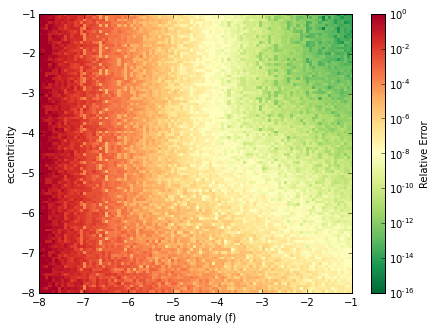

In [5]:
import rebound
import random
import numpy as np

def simulation(par):
    e,f = par
    e = 10**e
    f = 10**f
    sim = rebound.Simulation()
    sim.add(m=1.)
    a = 1.
    inc = random.random()*np.pi
    Omega = random.random()*2*np.pi
    omega = random.random()*2*np.pi
    sim.add(m=0.,a=a,e=e,inc=inc,Omega=Omega, omega=omega,f=f)
    o=sim.calculate_orbits()[0]
    if o.omega < 0:
        o.omega += 2*np.pi
    if o.Omega < 0:
        o.Omega += 2*np.pi
    if o.f < 0:
        o.f += 2*np.pi
    err = max(np.fabs(o.e-e)/e, np.fabs(o.f-f)/f)
    return err

random.seed(1)
N = 100
es = np.linspace(-8.,-1.,N)
fs = np.linspace(-8.,-1.,N)
print(es)
params = [(e,f) for e in es for f in fs]

pool=rebound.InterruptiblePool()
res = pool.map(simulation, params)
res = np.array(res).reshape(N,N)
res = np.nan_to_num(res)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LogNorm
import matplotlib

f,ax = plt.subplots(1,1,figsize=(7,5))
extent=[fs.min(), fs.max(), es.min(), es.max()]

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xlabel(r"true anomaly (f)")
ax.set_ylabel(r"eccentricity")

im = ax.imshow(res, norm=LogNorm(), vmax=1., vmin=1.e-16, aspect='auto', origin="lower", interpolation='nearest', cmap="RdYlGn_r", extent=extent)
cax,kw = matplotlib.colorbar.make_axes([ax])
cb = plt.colorbar(im, cax=cax, **kw)
cb.solids.set_rasterized(True)
cb.set_label("Relative Error")

In [12]:
print(res)

[[  1.00000000e+00   1.05574960e-01   2.32892158e-02   3.35594855e-04
    1.48392168e-04   3.25517394e-05   5.82631400e-06   7.31255564e-07
    1.10084003e-07   4.63701308e-08]
 [  1.10734243e+00   1.83808862e-02   1.08485367e-03   1.12783392e-04
    1.26869516e-05   3.96051580e-06   6.93325246e-07   1.35978362e-08
    1.29397108e-08   1.10760954e-08]
 [  1.00000000e+00   3.01779677e-05   7.75639869e-04   5.73383667e-06
    8.94895084e-07   1.10558874e-06   2.63393383e-08   4.43385660e-09
    3.70339968e-09   8.61894191e-10]
 [  1.10734243e+00   1.83808862e-02   4.66521730e-04   5.80621609e-07
    1.36631369e-07   4.44957834e-08   3.29481949e-10   1.49829389e-09
    4.28926850e-10   6.47117239e-11]
 [  1.00000000e+00   3.01779677e-05   1.51427929e-04   4.57256691e-06
    3.52897690e-08   5.78017625e-09   2.13315637e-10   7.53139787e-11
    3.03752129e-11   2.00482930e-11]
 [  1.10734243e+00   1.86636232e-02   1.57499160e-04   4.57256691e-06
    3.52897675e-08   1.47844492e-09   6.87478